# The Birthday Paradox

The birthday paradox stems from the following question:

>How many people do there need to be before it is more likely than not that at least two of those people share the same birthday?

For simplicity we are going to assume the following:
1. Leap years don't exist
2. Birthdays have a uniform distribution - that is, each day of the year has an equal proportion of birthdays.

Without making too many calculations, try having a guess at what you think it might be. How many people's birthdays do you know? How many of those share the same birthday? The answer has to be somewhere between 2 and 365. If there are 365 days in a year (excluding leap years), it is a certainty that two people will share a birthday at 366 people. 

The answer may surprise you which in itself highlights that probability isn't always as intuitive as we might like. We will get the answer to this problem using two different methods. The first is to run a large simulation in python and the second is using good old fashioned maths.

### Method 1: Computer Simulation

Maybe you've thought about the problem and you're not sure how to work it out mathematically - that's ok because we can run a computer simulation that should at least get us very close to the truth.

For the simulation, we are going to repeatedly generate a random series of integers between 1 and 365 that represent each day of the year. Starting with series of size 2, 10,000 samples will be generated. The proportion of samples containing a duplicate will be recorded before generating another 10,000 random samples, but this time of size 3. This will repeat up to a size of size 365 at which point we can plot the proportion of duplicates in each of the sizes. This in effect is our best guess at the probability of someone sharing a birthday for $n$ number of people.

Onto the code...

The below cell runs the simulation:

In [1]:
# Import modules
import plotly.graph_objects as go
from numpy import ndarray, unique, average, apply_along_axis
from numpy.random import randint
from math import factorial


# Function for finding whether a numpy array contains duplicates.
def has_duplicates(arr: ndarray) -> bool:
    return len(arr) > len(unique(arr))


# Function to return the proportion of duplicates found in each sample
def proportion_containing_duplicates(arr: ndarray) -> float:
    """
    Returns the proportion of rows in a 2D-array that contain duplicates
    """
    return average(apply_along_axis(has_duplicates, axis=1, arr=arr))


def proportion_duplicate_by_size(samples: int, size: int) -> float:
    """
    Generates random integers between 1 and 365 in a 2D-array and returns the proportion of rows containing duplicates
    samples: how rows of samples to generate
    size: the size of each sample
    """
    return proportion_containing_duplicates(randint(low=1, high=366, size=(samples, size)))


def run_simulation() -> list:
    """Returns a list of the proportion containing duplicates from 10000 samples of size 2 through to 100"""
    return [*map(lambda x: proportion_duplicate_by_size(samples=10000, size=x), range(2,101))]


print('Running simulation, this may take up to a minute...')
simulation_results = run_simulation()
print('\nSimulation completed!')


Running simulation, this may take up to a minute...

Simulation completed!


Now we have the simulation results, run the next block of code to plot and visualise the results...

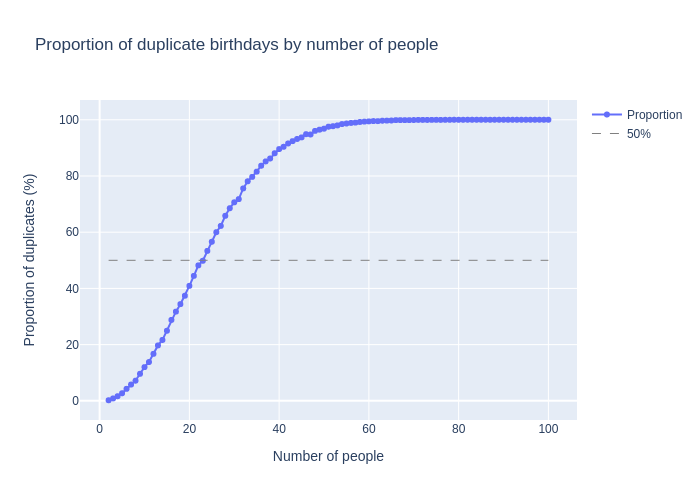

In [3]:
# Import the plotly graphing library


# Create plotting figure
fig = go.Figure()

# Add line plot of proportions
fig.add_trace(
    go.Scatter(
        x=[*range(2,101)], 
        y=[*map(lambda x: x*100, simulation_results)],
        mode='lines+markers',
        name='Proportion',
        )
    )

# Add a dashed marker highlighted the 50% mark.
fig.add_trace(
    go.Scatter(
        x=[*range(2,101)],
        y=[50]*99,
        line=dict(color='grey', width=1, dash='dash'),
        name='50%'
    )
)

# Update chart layout
fig.update_layout(
    title='Proportion of duplicate birthdays by number of people',
    xaxis_title='Number of people',
    yaxis_title='Proportion of duplicates (%)'
)

# Display chart
fig.show('png')

The chart shows the results of the simulation where the blue line is the proportion of samples containing duplicate birthdays and the dashed line provides a reference for the 50% mark.

The chart should cross over the 50% mark at around 23 people. This means that the answer to the original question appears to be that it takes 23 people before it is more likely than not that someone will share a birthday. Is this far from your original guess? Does this answer surprise you? How do we know this isn't the result of some dodgy code? Enter maths.

### Method 2: Maths

The solution lies in a branch of mathematics known as `combinatorics` - maths involving combinations of things. First, we need to think about how many combinations of birthdays there can be for $n$ number of people. One person has one of a possible 365 birthdays, whereas 2 people generate $365\times365$ birthday combinations and 3 people $365\times365\times365$. So, the number of possible combinations of birthdays $n$ number of people can have is $365^n$.

Next, perhaps counterintuitively, consider the possible number of birthday combinations there can be when there are no duplicates. Person 1 can have their birthday on any of the 365 days, person 2 can have a birthday on any of the other 364 days, person 3 on any of the remaining 363 days and so on. So, for 3 people for example, the number of possible birthday combinations there can be when none are duplicated is $365\times364\times363$. If we then divide this by $365^3$, we have the proportion of all possible combinations containing no duplicates out of all possible combinations (for 3 people). This gives approximately 0.9918 (or 99.18%). However, this is the probability that 3 people will not share a birthday. To convert this to the probability that at least 2 of the 3 people share a birthday, simply take this result from 1. This gives $1 - 0.9918 = 0.0082$ (or 0.82%).

We will now use python again to run each of these mathematical calculations and then finally produce a plot comparing the simulation results to the mathematical method.

The cell below produces the maths results:

In [4]:
def npermutations(n: int, r: int) -> int:
    """
    Returns the number of permutations given n and r
    n: int - the number of objects
    r: int - the number of objects taken at a time
    """
    return int(factorial(n) / factorial(n-r))


def probability_of_duplicates(n: int) -> float:
    """
    Returns the probability of a duplicate value in n permutations from 365 days in the year
    """
    return 1 - (npermutations(365, n) / 365**n)


def mathematical_duplicate_probabilities() -> list:
    """
    Returns a list of duplicate probabilities for n in range 2, 101
    """
    return [*map(probability_of_duplicates, range(2, 101))]


print('Obtaining mathematical results...')
mathematical_results = mathematical_duplicate_probabilities()
print('\nCalculations completed!')


Obtaining mathematical results...

Calculations completed!


Finally, the below cell plots the results from the mathematical formula against the simulation for comparison.

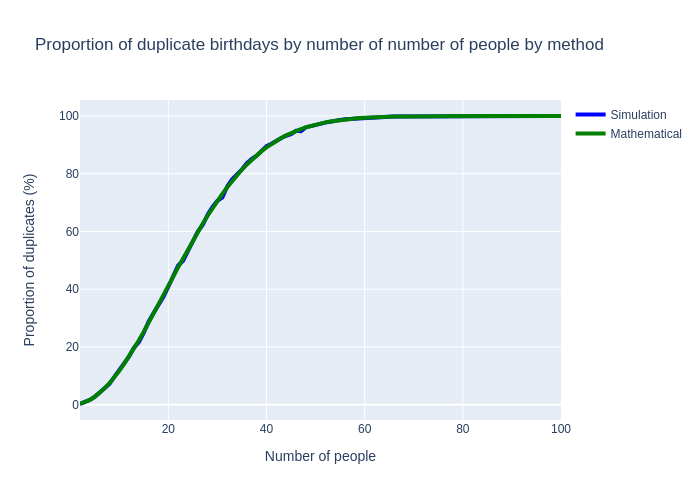

In [5]:
# Create plotting figure
fig = go.Figure()

# Add line plot of proportions
fig.add_trace(
    go.Scatter(
        x=[*range(2,101)], 
        y=[*map(lambda x: x*100, simulation_results)],
        line=dict(color='blue', width=4),
        name='Simulation',
        )
    )

# Add a dashed marker highlighted the 50% mark.
fig.add_trace(
    go.Scatter(
        x=[*range(2,101)],
        y=[*map(lambda x: round(x*100, 2), mathematical_results)],
        line=dict(color='green', width=4),
        name='Mathematical'
    )
)

# Update chart layout
fig.update_layout(
    title='Proportion of duplicate birthdays by number of number of people by method',
    xaxis_title='Number of people',
    yaxis_title='Proportion of duplicates (%)'
)

# Display chart
fig.show('png')

### Conclusion

The above chart shows that there is very little difference in results between the simulation and maths methods. It is indeed true that it takes 23 people to have more chance than not that at least two of those people will share the same birthday (under the assumptions mentioned in the intro).

#### Closing Remarks

I first came across the birthday problem in the book *How to Solve the Da Vinci Code and 34 Other Really Interesting Uses of Mathematics* by Dr. Richard Elwes and was further inspired to create this notebook by another book called *Think Python* by Allen B. Downey. *Think Python* is available for free at *green tea press* here: *https://greenteapress.com/wp/think-python-2e/*. For more by Richard Elwes, see his books on Amazon here: *https://www.amazon.co.uk/Books-Dr-Richard-Elwes/s?rh=n%3A266239%2Cp_27%3ADr+Richard+Elwes*

Much of this code uses the *NumPy* and *Plotly* python libraries. Read the NumPy documentation here *https://numpy.org/doc/stable/index.html* and the plotly documention here *https://plotly.com/python/*.

This code was written in an environment using the following package versions:
- python=3.10.4
- numpy=1.23.1
- ipykernel=6.9.1
- nbformat=5.3.0
- plotly=5.9.0

Thank you for reading.

`Notebook by Andrew Villiers, August 2022.`